In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import MultinomialNB

In [2]:
data = pd.read_csv('sentences.csv')
data.sample(5)

,id,lan_code,sentence
4238108,4513140,spa,Yo las ayudé.
5128959,5477098,rus,Мне не следовало вам верить.
9208724,9652124,kab,Amur ameqqran n yizzayriyen smenyafen tamharsa...
5934174,6311450,hun,Tomnak nagyon jó üzleti érzéke van.
5127171,5475100,rus,"Говорят, у вас там в Питере царя скинули?"


In [3]:
data.isnull().sum()

id          0
lan_code    0
sentence    0
dtype: int64

In [4]:
len(data[data['lan_code']=='jpn'])

220103

<Axes: xlabel='lan_code'>

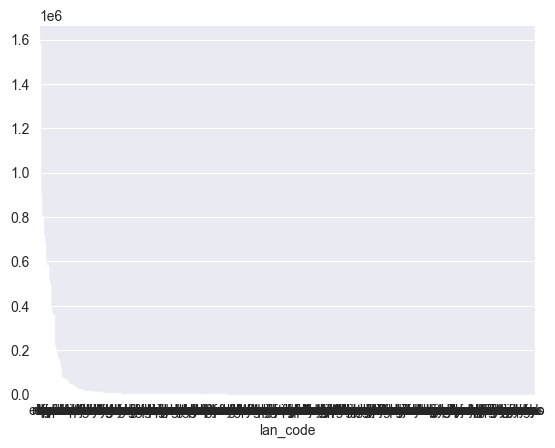

In [5]:
counts = data['lan_code'].value_counts()
sns.barplot(x=counts.index, y=counts.values)

In [6]:
data_learn = data.drop(["id"], axis=1)
data_learn.head()

,lan_code,sentence
0,cmn,我們試試看！
1,cmn,我该去睡觉了。
2,cmn,你在干什麼啊？
3,cmn,這是什麼啊？
4,cmn,今天是６月１８号，也是Muiriel的生日！


In [7]:
cv = CountVectorizer()
x = cv.fit_transform(data['sentence'])

y = data["lan_code"]
y = y.values.reshape(-1, 1)
ordinal_encoder = OrdinalEncoder()
y = ordinal_encoder.fit_transform(y)
y = y.ravel()

In [8]:

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
print(clf.score(xtest, ytest))

MemoryError: Unable to allocate 12.4 GiB for an array with shape (8273449, 403) and data type int32

In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = clf.predict(data)
print(ordinal_encoder.inverse_transform(output.reshape(-1, 1)))